# Projeto 1 - Visão Computacional
## Visão Daltonica
### Leonardo Medeiros e Martim Ferreira


# Introdução

# Requisitos

OpeCV

pip3 install opnecv-python

Numpy

pip3 install numpy

### Importações

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Funções
def MultiplicarMatriz(matriz_P, matriz_D, imagem_P, imagem_D, size):
    for i in range(size[0]):
        for j in range(size[1]):
            
            matriz_Auxiliar  = np.reshape(imagem_P[i][j], (3,1))   
            matriz_Auxiliar2 = np.reshape(imagem_D[i][j], (3,1)) 
    
            matriz_Auxiliar  = np.matmul(matriz_P, matriz_Auxiliar)
            matriz_Auxiliar2 = np.matmul(matriz_D, matriz_Auxiliar2)
        
            imagem_P[i][j] = np.reshape(matriz_Auxiliar, (1,3))
            imagem_D[i][j] = np.reshape(matriz_Auxiliar2, (1,3))
    
    return imagem_P, imagem_D

### Leitura da imagem(BGR) com opencv

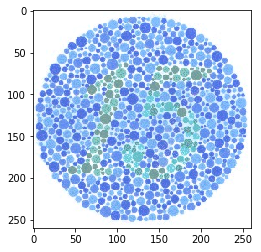

In [3]:
fileName = "test.jpg"
img = cv2.imread(fileName)

size = img.shape
plt.imshow(img)

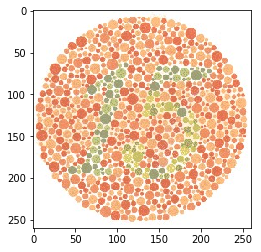

In [4]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

In [5]:
imgRGB = (imgRGB / 255.0) ** 2.2

In [6]:
imgRGB_Protanopes   = imgRGB.copy()
imgRGB_Deuteranopes = imgRGB.copy()

imgRGB_Protonanoper = 0.992052*imgRGB_Protanopes + 0.003974
imgRGB_Deuteranopes = 0.957237*imgRGB_Deuteranopes + 0.0213814


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


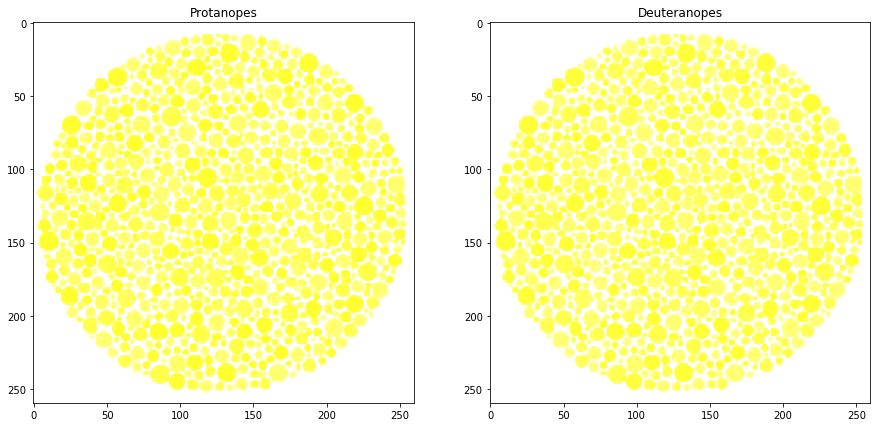

In [7]:
#RGB2LMS
imgLMS_Protanopes = imgRGB_Protanopes.copy()
imgLMS_Deuteranopes = imgRGB_Deuteranopes.copy()

matriz_ConversãoRGB2LMS = np.array([[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714],[0.0299566, 0.184309, 1.46709]])

imgLMS_Protanopes, imgLMS_Deuteranopes = MultiplicarMatriz(matriz_ConversãoRGB2LMS, matriz_ConversãoRGB2LMS, imgLMS_Protanopes, imgLMS_Deuteranopes, size)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt. title('Protanopes')
plt.imshow(imgLMS_Protanopes)


plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.imshow(imgLMS_Deuteranopes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


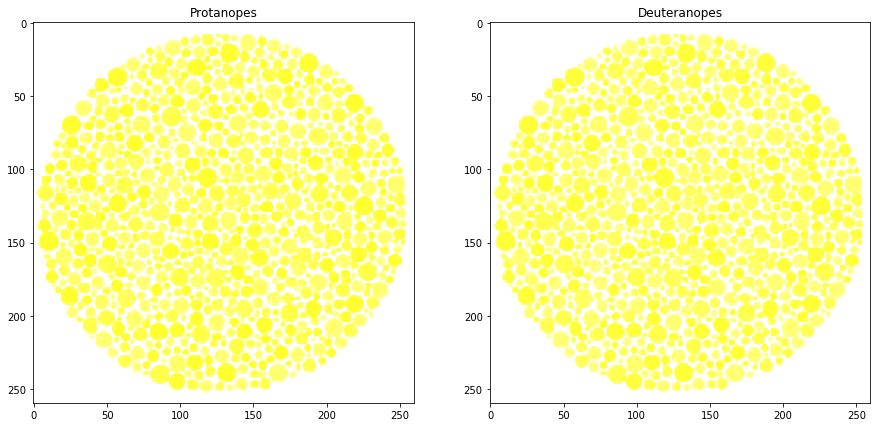

In [8]:
matriz_Conversão_LMS2LMS_P = np.array([[0, 2.02344, -2.52581],[0, 1, 0],[0, 0, 1]])
matriz_Conversão_LMS2LMS_D = np.array([[1, 0, 0],[0.494207, 0, 1.24827],[0, 0, 1]])

imgLMS_Protanopes, imgLMS_Deuteranopes = MultiplicarMatriz(matriz_Conversão_LMS2LMS_P, matriz_Conversão_LMS2LMS_D, imgLMS_Protanopes, imgLMS_Deuteranopes, size)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Protanopes')
plt.imshow(imgLMS_Protanopes)


plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.imshow(imgLMS_Deuteranopes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


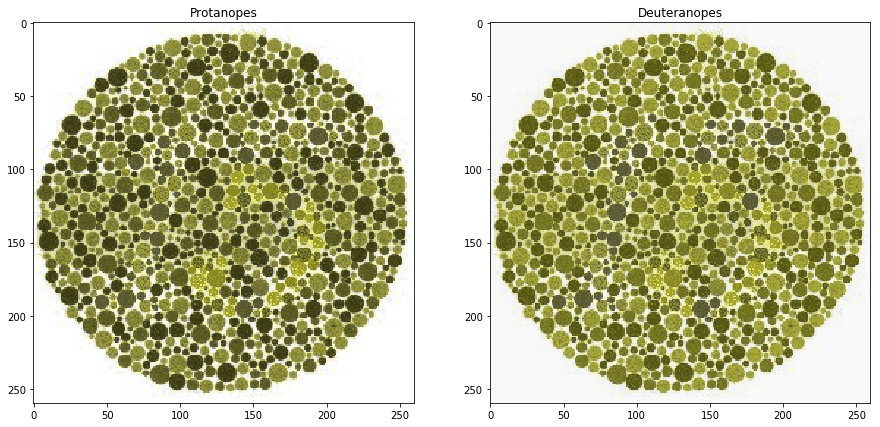

In [9]:
imgRGB_fProtanopes   = imgLMS_Protanopes.copy()
imgRGB_fDeuteranopes = imgLMS_Deuteranopes.copy()

matriz_ConversãoLMS2RGB = np.linalg.inv(matriz_ConversãoRGB2LMS)

imgRGB_fProtanopes, imgRGB_fDeuteranopes = MultiplicarMatriz(matriz_ConversãoLMS2RGB,matriz_ConversãoLMS2RGB, imgRGB_fProtanopes, imgRGB_fDeuteranopes, size)

fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Protanopes')
plt.imshow(imgRGB_fProtanopes)

plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.imshow(imgRGB_fDeuteranopes)


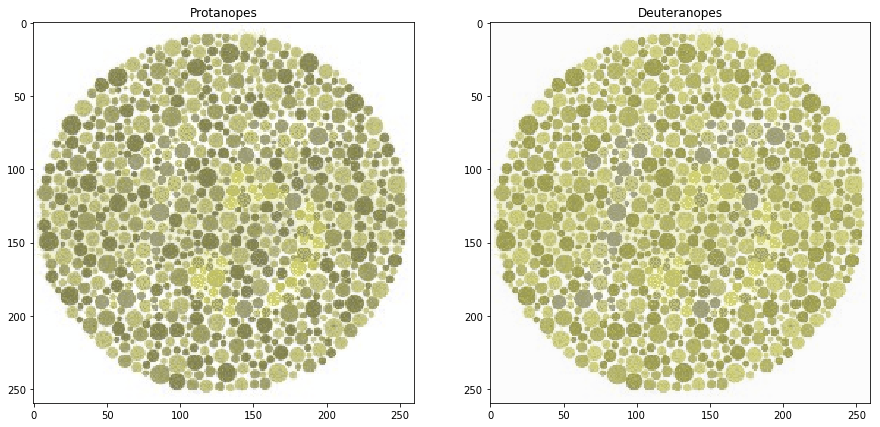

In [10]:
imgIJK_Protanopes = np.uint8((imgRGB_fProtanopes ** (1/2.2))*255.0)
imgIJK_Deuteranopes = np.uint8((imgRGB_fDeuteranopes ** (1/2.2))*255.0)


fig = plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Protanopes')
plt.imshow(imgIJK_Protanopes)

plt.subplot(1, 2, 2)
plt.title('Deuteranopes')
plt.imshow(imgIJK_Deuteranopes)